To analazy if the patient or theb adult person is asleep, awake or walking at the current movement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn
from scipy import stats
import math
from tensorflow.keras import layers
  # Import the stats module from scipy
#import tensorflow_decision_forests as tfdf
#from wurlitzer import sys_pipes

%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Print versions
print('TensorFlow ' + tf.__version__)


TensorFlow 2.15.0


In [2]:
file_path = '/content/drive/MyDrive/dataset/Accelerometer_embedded_inteliigence_dataset.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)


df.head()


,Timestamp,X-Acceleration,Y-Acceleration,Z-Acceleration,Activity
0,18:43:50,X-Acceleration: -0.63 g,Y-Acceleration: -0.52 g,Z-Acceleration: 1.02 g,Sleeping
1,18:43:51,X-Acceleration: -0.63 g,Y-Acceleration: -0.51 g,Z-Acceleration: 1.02 g,Sleeping
2,18:43:52,X-Acceleration: -0.63 g,Y-Acceleration: -0.52 g,Z-Acceleration: 1.02 g,Sleeping
3,18:43:53,X-Acceleration: -0.62 g,Y-Acceleration: -0.53 g,Z-Acceleration: 1.02 g,Sleeping
4,18:43:54,X-Acceleration: -0.62 g,Y-Acceleration: -0.51 g,Z-Acceleration: 1.03 g,Sleeping


In [ ]:
# summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       524 non-null    object
 1   X-Acceleration  524 non-null    object
 2   Y-Acceleration  524 non-null    object
 3   Z-Acceleration  524 non-null    object
 4   Activity        524 non-null    object
dtypes: object(5)
memory usage: 20.6+ KB


**Cleaning the Dataset and Preprocessing**

In [3]:
import re

# Expression to match numbers with decimals, plus and minus signs
pattern = re.compile(r'[-+]?\d*\.?\d+')
# Function to extract numbers from each string
def extract_numbers(text):
    return ''.join(pattern.findall(text))

# Applying the function to each column in the DataFrame
for column in df.columns:
    df['X-Acceleration'] = df['X-Acceleration'].apply(extract_numbers)
    df['Y-Acceleration'] = df['Y-Acceleration'].apply(extract_numbers)
    df['Z-Acceleration'] = df['Z-Acceleration'].apply(extract_numbers)



print(df)




    Timestamp X-Acceleration Y-Acceleration Z-Acceleration  \
0    18:43:50          -0.63          -0.52           1.02   
1    18:43:51          -0.63          -0.51           1.02   
2    18:43:52          -0.63          -0.52           1.02   
3    18:43:53          -0.62          -0.53           1.02   
4    18:43:54          -0.62          -0.51           1.03   
..        ...            ...            ...            ...   
519  18:52:39           0.64          -0.61           0.35   
520  18:52:40           0.45          -0.51           0.37   
521  18:52:41           0.47          -0.61           0.33   
522  18:52:42           0.81          -0.62           0.31   
523  18:52:43           0.97          -0.69           0.27   

                     Activity  
0                   Sleeping   
1                   Sleeping   
2                   Sleeping   
3                   Sleeping   
4                   Sleeping   
..                        ...  
519   walking down the stairs  

In [ ]:
df.head()

,Timestamp,X-Acceleration,Y-Acceleration,Z-Acceleration,Activity
0,18:43:50,-0.63,-0.52,1.02,Sleeping
1,18:43:51,-0.63,-0.51,1.02,Sleeping
2,18:43:52,-0.63,-0.52,1.02,Sleeping
3,18:43:53,-0.62,-0.53,1.02,Sleeping
4,18:43:54,-0.62,-0.51,1.03,Sleeping


In [4]:

df['X-Acceleration'] = df['X-Acceleration'].astype(float)
df['Y-Acceleration'] = df['Y-Acceleration'].astype(float)
df['Z-Acceleration'] = df['Z-Acceleration'].astype(float)
print(df.dtypes)

Timestamp          object
X-Acceleration    float64
Y-Acceleration    float64
Z-Acceleration    float64
Activity           object
dtype: object


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%H:%M:%S')

# Extracting hours, minutes, and seconds and converting them into seconds
df['Timestamp'] = df['Timestamp'].dt.hour * 3600 + df['Timestamp'].dt.minute * 60 + df['Timestamp'].dt.second



In [ ]:
print(df)

print(df.dtypes)

     Timestamp  X-Acceleration  Y-Acceleration  Z-Acceleration  \
0        67430           -0.63           -0.52            1.02   
1        67431           -0.63           -0.51            1.02   
2        67432           -0.63           -0.52            1.02   
3        67433           -0.62           -0.53            1.02   
4        67434           -0.62           -0.51            1.03   
..         ...             ...             ...             ...   
519      67959            0.64           -0.61            0.35   
520      67960            0.45           -0.51            0.37   
521      67961            0.47           -0.61            0.33   
522      67962            0.81           -0.62            0.31   
523      67963            0.97           -0.69            0.27   

                     Activity  
0                   Sleeping   
1                   Sleeping   
2                   Sleeping   
3                   Sleeping   
4                   Sleeping   
..             

Exploratory Data Analysis

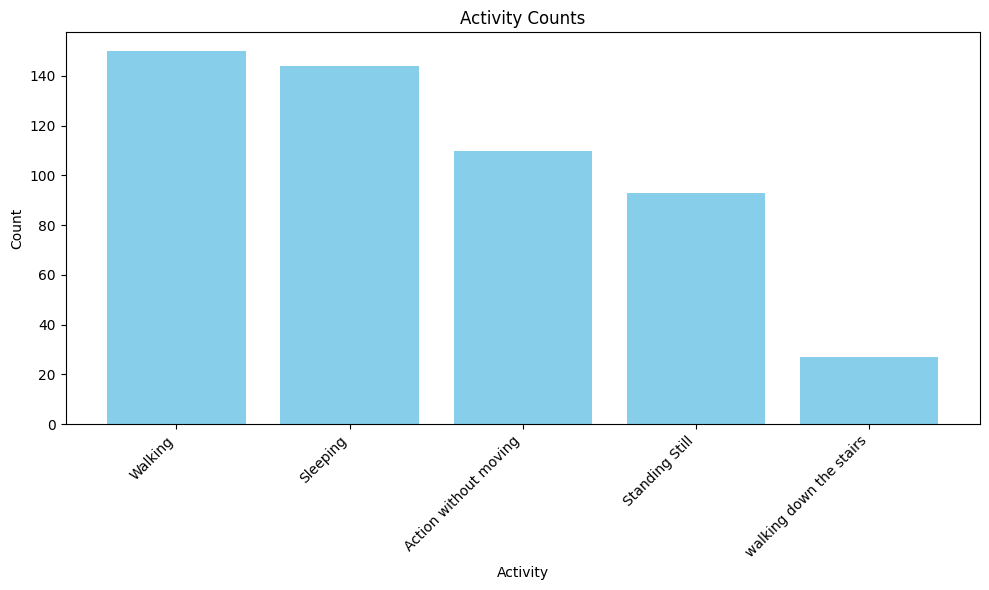

In [6]:
activities = ['Walking', 'Sleeping', 'Action without moving', 'Standing Still', 'walking down the stairs']
counts = [150, 144, 110, 93, 27]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(activities, counts, color='skyblue')  # Create the bar plot
plt.xlabel('Activity')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.title('Activity Counts')  # Title for the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot


In [7]:
#timestamp is not necessary
df.drop(columns=['Timestamp'], inplace=True)
ActivityCounts = df['Activity'].value_counts()
print(ActivityCounts)

Activity
 Walking                    150
 Sleeping                   144
 Action without moving      110
 Standing Still              93
 walking down the stairs     27
Name: count, dtype: int64


Splitting dataset

In [ ]:
# Install TF-DF
#!pip install tensorflow tensorflow_decision_forests


In [11]:

# Load TF-DF
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load TF-DF
#import tensorflow_decision_forests as tfdf
import pandas as pd

# Encode categorical labels
label_encoder = LabelEncoder()
df['Activity'] = label_encoder.fit_transform(df['Activity'])


# Define features (X) and target (y)
X = df.drop(columns=["Activity"])  # Features
y = df["Activity"]  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


# Convert the dataset into a TensorFlow dataset.
#train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="Activity")
#test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label="Activity")




In [ ]:
print(y_train)

25     1
242    0
231    2
450    3
188    2
      ..
70     1
132    1
289    0
109    1
480    3
Name: Activity, Length: 419, dtype: int64


In [12]:

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(5, activation='softmax')  # Adjusted output layer for 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
# View model
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
Total params: 1381 (5.39 KB)
Trainable params: 1381 (5.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Train model
history = model.fit(X_train, y_train, epochs=500, batch_size=100)




Epoch 1/500
5/5 [==============================] - 1s 5ms/step - loss: 1.5966 - accuracy: 0.1241
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 1.5639 - accuracy: 0.2792
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 1.5362 - accuracy: 0.2792
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 1.5129 - accuracy: 0.2792
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 1.4924 - accuracy: 0.2792
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 1.4733 - accuracy: 0.2792
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 1.4576 - accuracy: 0.2816
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 1.4417 - accuracy: 0.2864
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 1.4286 - accuracy: 0.2983
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: 1.4152 - accuracy: 0.3103
Epoch 11/500
5/5 [===========

In [15]:
predictions = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [16]:
# Assuming you have X_test and y_test
# Use the trained model to make predictions on X_test
y_pred = model.predict(X_test)

# Convert the predicted probabilities into class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_test)

print("Accuracy:", accuracy)


4/4 [==============================] - 0s 3ms/step
Accuracy: 0.8761904761904762


In [22]:
# Save the model with a .keras extension
model.save('/content/drive.keras')


In [25]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [26]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


In [ ]:


df.info()
print(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X-Acceleration  524 non-null    float64
 1   Y-Acceleration  524 non-null    float64
 2   Z-Acceleration  524 non-null    float64
 3   Activity        524 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 16.5 KB
     X-Acceleration  Y-Acceleration  Z-Acceleration  Activity
0             -0.63           -0.52            1.02         1
1             -0.63           -0.51            1.02         1
2             -0.63           -0.52            1.02         1
3             -0.62           -0.53            1.02         1
4             -0.62           -0.51            1.03         1
..              ...             ...             ...       ...
519            0.64           -0.61            0.35         4
520            0.45           -0.51            0.37         4
521            0.

In [ ]:
#plotting
for i in activities:
    data1 = df[(df['Activity'] == i)][:500]
    sbn.lineplot(y = 'X-Acceleration', x = 'Timestamp', data = data1)
    sbn.lineplot(y = 'Y-Acceleration', x = 'Timestamp', data = data1)
    sbn.lineplot(y = 'Z-Acceleration', x = 'Timestamp', data = data1)
    plt.legend(['x-acc', 'y-acc', 'z-acc'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

Data Pre-processing


The following steps are required to deploy and run a TensorFlow model on a microcontroller:

Train a model:
Generate a small TensorFlow model that can fit your target device and contains supported operations.
Convert to a TensorFlow Lite model using the TensorFlow Lite converter.
Convert to a C byte array using standard tools to store it in a read-only program memory on device.
Run inference on device using the C++ library and process the results.

In [27]:
# Convert TFLite model to C byte array
!xxd -i model.tflite > mymodel_data.h
